In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.DataFrame(pd.read_csv('Housing.csv'))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
m = len(housing)

In [4]:
# You can see that your dataset has many columns with values as 'Yes' or 'No'.
# But in order to fit a regression Line, we would need numerical values and not string
# List of variables to map
num_vars_b = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map (v1) :
    return v1.map({'yes' : 1, "no": 0})

# Applying the function to the housing List
housing[num_vars_b] = housing[num_vars_b] . apply(binary_map)
#Check the housing dataframe now
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [5]:
housing = housing.drop(labels = "furnishingstatus", axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [6]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test =train_test_split(housing, train_size = 0.8, test_size = 0.2)
df_train.shape

(436, 12)

In [7]:
num_vars_b = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 
           'airconditioning', 'parking', 'prefarea']
df_Newtrain_b = df_train[num_vars_b]
df_Newtest_b = df_test[num_vars_b]
df_Newtrain_b.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,1750000,3620,2,1,1,1,0,0,0,0,0,0
496,2695000,4000,2,1,1,1,0,0,0,0,0,0
484,2870000,3040,2,1,1,0,0,0,0,0,0,0
507,2590000,3600,2,1,1,1,0,0,0,0,0,0
252,4515000,9860,3,1,1,1,0,0,0,0,0,0


In [8]:
y_train_b = df_Newtrain_b.values[:,0]
X_train_b = df_Newtrain_b.values[:,1:13]
y_test_b = df_Newtest_b.values[:,0]
X_test_b = df_Newtest_b.values[:,1:13]

In [9]:
#Lets create a matrix with single column of ones 
X_01 = np.ones((436, 1)) 
X_02 = np.ones((109, 1)) 

In [10]:
# Using reshape function convert X 1D array to 2D array of dimension 97x1 
X_N1_b = X_train_b.reshape(436, 11) 
X_N2_b = X_test_b.reshape(109, 11)

In [11]:
X_train_b = np.hstack((X_01, X_N1_b)) 
X_test_b = np.hstack((X_02, X_N2_b)) 

In [12]:
theta = np.zeros(12) 
theta
y_train_b.shape

(436,)

In [13]:
def compute_cost(X, y, theta): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sqrErrors = np.square(errors) 
    J = 1 / (2 * m) * np.sum(sqrErrors) 

    return J

In [14]:
def gradient_descent(X, X2, y ,y2, theta, alpha, iterations):
    cost_history = np.zeros(iterations) 
    cost_history2 = np.zeros(iterations) 

    for i in range(iterations): 
        predictions = X.dot(theta) 
        errors = np.subtract(predictions, y) 
        sum_delta = (alpha / m) * X.transpose().dot(errors); 
        theta = theta - sum_delta; 
        cost_history[i] = compute_cost(X, y, theta)   
        cost_history2[i] = compute_cost(X2, y2, theta)
    return theta, cost_history, cost_history2

In [15]:
#theta = [0.0, 0.0, 0.0, 0.0, 0.0] 
iterations = 10000; 
alpha = 0.000000001;

In [16]:
theta, cost_history_b, cost_history2_b = gradient_descent(X_train_b, X_test_b, y_train_b, y_test_b, theta, alpha, iterations) 
print('Final value of theta =', theta) 
print('cost_history =', cost_history_b[-1], cost_history2_b[-1])

Final value of theta = [2.87786987e+00 8.61026282e+02 1.11060276e+01 6.19464672e+00
 9.54180228e+00 2.61056270e+00 1.30912052e+00 2.14150566e+00
 5.67144437e-01 2.50807992e+00 2.77880126e+00 1.33829171e+00]
cost_history = 1363664175889.0417 310125350878.32025


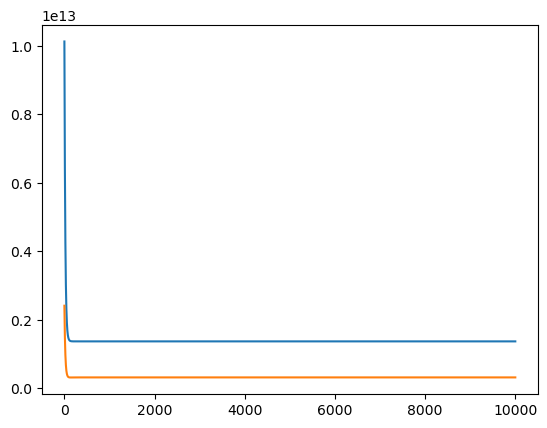

In [17]:
plt.plot(cost_history_b, label = "line 1")
plt.plot(cost_history2_b, label = "line 2")

In [18]:
housing = pd.DataFrame(pd.read_csv('Housing.csv'))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [19]:
m = len(housing)

In [20]:
# You can see that your dataset has many columns with values as 'Yes' or 'No'.
# But in order to fit a regression Line, we would need numerical values and not string
# List of variables to map
num_vars_b = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map (v1) :
    return v1.map({'yes' : 1, "no": 0})

# Applying the function to the housing List
housing[num_vars_b] = housing[num_vars_b] . apply(binary_map)
#Check the housing dataframe now
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [21]:
m = len(housing)

In [22]:
housing = housing.drop(labels = "furnishingstatus", axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [23]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test =train_test_split(housing, train_size = 0.8, test_size = 0.2)
df_train.shape

(436, 12)

In [24]:
num_vars_b = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 
           'airconditioning', 'parking', 'prefarea']
df_Newtrain_b = df_train[num_vars_b]
df_Newtest_b = df_test[num_vars_b]
df_Newtrain_b.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,1750000,3620,2,1,1,1,0,0,0,0,0,0
496,2695000,4000,2,1,1,1,0,0,0,0,0,0
484,2870000,3040,2,1,1,0,0,0,0,0,0,0
507,2590000,3600,2,1,1,1,0,0,0,0,0,0
252,4515000,9860,3,1,1,1,0,0,0,0,0,0


In [25]:
import warnings
warnings. filterwarnings( 'ignore' )
from sklearn. preprocessing import MinMaxScaler, StandardScaler

#scaler = StandardScaler()
scaler = MinMaxScaler()
df_Newtrain_b[num_vars_b] = scaler.fit_transform(df_Newtrain_b[num_vars_b])
df_Newtest_b[num_vars_b] = scaler.fit_transform(df_Newtest_b[num_vars_b])
df_Newtrain_b.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,0.000000,0.124199,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
496,0.081818,0.150654,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
484,0.096970,0.083821,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.072727,0.122807,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
252,0.239394,0.558619,0.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
y_train_b = df_Newtrain_b.values[:,0]
X_train_b = df_Newtrain_b.values[:,1:13]
y_test_b = df_Newtest_b.values[:,0]
X_test_b = df_Newtest_b.values[:,1:13]

In [27]:
#Lets create a matrix with single column of ones 
X_01 = np.ones((436, 1)) 
X_02 = np.ones((109, 1)) 

In [28]:
# Using reshape function convert X 1D array to 2D array of dimension 97x1 
X_N1_b = X_train_b.reshape(436, 11) 
X_N2_b = X_test_b.reshape(109, 11)

In [29]:
X_train_b = np.hstack((X_01, X_N1_b)) 
X_test_b = np.hstack((X_02, X_N2_b)) 

In [30]:
theta = np.zeros(12) 
theta
y_train_b.shape

(436,)

In [31]:
def compute_cost(X, y, theta): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sqrErrors = np.square(errors) 
    J = 1 / (2 * m) * np.sum(sqrErrors) 

    return J

In [32]:
def gradient_descent(X, X2, y ,y2, theta, alpha, iterations):
    cost_history = np.zeros(iterations) 
    cost_history2 = np.zeros(iterations) 

    for i in range(iterations): 
        predictions = X.dot(theta) 
        errors = np.subtract(predictions, y) 
        sum_delta = (alpha / m) * X.transpose().dot(errors); 
        theta = theta - sum_delta; 
        cost_history[i] = compute_cost(X, y, theta)   
        cost_history2[i] = compute_cost(X2, y2, theta)
    return theta, cost_history, cost_history2

In [33]:
#theta = [0.0, 0.0, 0.0, 0.0, 0.0] 
iterations = 11000; 
alpha = 0.000000001;

In [34]:
theta, cost_history_b, cost_history2_b = gradient_descent(X_train_b, X_test_b, y_train_b, y_test_b, theta, alpha, iterations) 
print('Final value of theta =', theta) 
print('cost_history =', cost_history_b[-1], cost_history2_b[-1])

Final value of theta = [2.30674289e-06 6.47563029e-07 9.88348384e-07 5.01878983e-07
 8.00325395e-07 2.13556521e-06 5.64752611e-07 9.12295552e-07
 1.24268104e-07 1.04612323e-06 7.09176664e-07 7.99368715e-07]
cost_history = 0.03841092832242674 0.010630799820302508


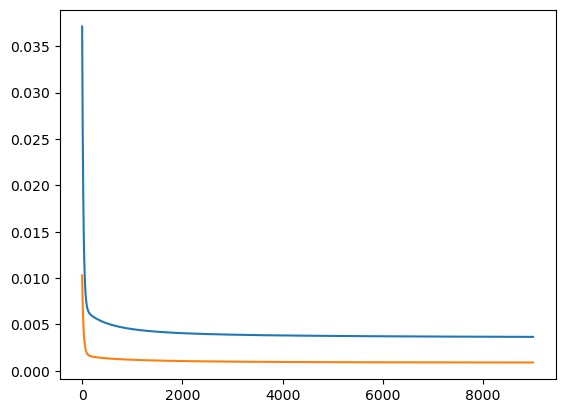

In [54]:
plt.plot(cost_history_b, label = "line 1")
plt.plot(cost_history2_b, label = "line 2")

In [36]:
housing = pd.DataFrame(pd.read_csv('Housing.csv'))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [37]:
m = len(housing)

In [38]:
# You can see that your dataset has many columns with values as 'Yes' or 'No'.
# But in order to fit a regression Line, we would need numerical values and not string
# List of variables to map
num_vars_b = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map (v1) :
    return v1.map({'yes' : 1, "no": 0})

# Applying the function to the housing List
housing[num_vars_b] = housing[num_vars_b] . apply(binary_map)
#Check the housing dataframe now
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [39]:
housing = housing.drop(labels = "furnishingstatus", axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [40]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test =train_test_split(housing, train_size = 0.8, test_size = 0.2)
df_train.shape

(436, 12)

In [41]:
num_vars_b = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 
           'airconditioning', 'parking', 'prefarea']
df_Newtrain_b = df_train[num_vars_b]
df_Newtest_b = df_test[num_vars_b]
df_Newtrain_b.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,1750000,3620,2,1,1,1,0,0,0,0,0,0
496,2695000,4000,2,1,1,1,0,0,0,0,0,0
484,2870000,3040,2,1,1,0,0,0,0,0,0,0
507,2590000,3600,2,1,1,1,0,0,0,0,0,0
252,4515000,9860,3,1,1,1,0,0,0,0,0,0


In [42]:
import warnings
warnings. filterwarnings( 'ignore' )
from sklearn. preprocessing import MinMaxScaler, StandardScaler

#scaler = StandardScaler()
scaler = MinMaxScaler()
df_Newtrain_b[num_vars_b] = scaler.fit_transform(df_Newtrain_b[num_vars_b])
df_Newtest_b[num_vars_b] = scaler.fit_transform(df_Newtest_b[num_vars_b])
df_Newtrain_b.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,0.000000,0.124199,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
496,0.081818,0.150654,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
484,0.096970,0.083821,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.072727,0.122807,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
252,0.239394,0.558619,0.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
y_train_b = df_Newtrain_b.values[:,0]
X_train_b = df_Newtrain_b.values[:,1:13]
y_test_b = df_Newtest_b.values[:,0]
X_test_b = df_Newtest_b.values[:,1:13]

In [44]:
#Lets create a matrix with single column of ones 
X_01 = np.ones((436, 1)) 
X_02 = np.ones((109, 1)) 

In [45]:
# Using reshape function convert X 1D array to 2D array of dimension 97x1 
X_N1_b = X_train_b.reshape(436, 11) 
X_N2_b = X_test_b.reshape(109, 11)

In [46]:
X_train_b = np.hstack((X_01, X_N1_b)) 
X_test_b = np.hstack((X_02, X_N2_b)) 

In [47]:
X_train_b = np.hstack((X_01, X_N1_b)) 
X_test_b = np.hstack((X_02, X_N2_b)) 

In [48]:
theta = np.zeros(12) 
theta
y_train_b.shape

(436,)

In [49]:
def compute_cost(X, y, theta): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sqrErrors = np.square(errors) 
    J = 1 / (2 * m) * np.sum(sqrErrors) 

    return J

In [50]:
def gradient_descent(X, X2, y ,y2, theta, alpha, iterations):
    cost_history = np.zeros(iterations) 
    cost_history2 = np.zeros(iterations)
    lmbda_value = 0.6;
    
    for i in range(iterations): 
        predictions = X.dot(theta) 
        errors = np.subtract(predictions, y) 
        sum_delta = (alpha / m) * (X.transpose().dot(errors) + lmbda_value * theta); 
        theta = theta - sum_delta; 
        cost_history[i] = compute_cost(X, y, theta)   
        cost_history2[i] = compute_cost(X2, y2, theta)
    return theta, cost_history, cost_history2

In [51]:
#theta = [0.0, 0.0, 0.0, 0.0, 0.0] 
iterations = 9000; 
alpha = 0.01;

In [52]:
theta, cost_history_b, cost_history2_b = gradient_descent(X_train_b, X_test_b, y_train_b, y_test_b, theta, alpha, iterations) 
print('Final value of theta =', theta) 
print('cost_history =', cost_history_b[-1], cost_history2_b[-1])

Final value of theta = [0.00723967 0.22242429 0.06864165 0.17673411 0.11004207 0.0466215
 0.04186627 0.02713731 0.09526308 0.08100394 0.07899188 0.06862949]
cost_history = 0.003651398322065597 0.0008887887287341692


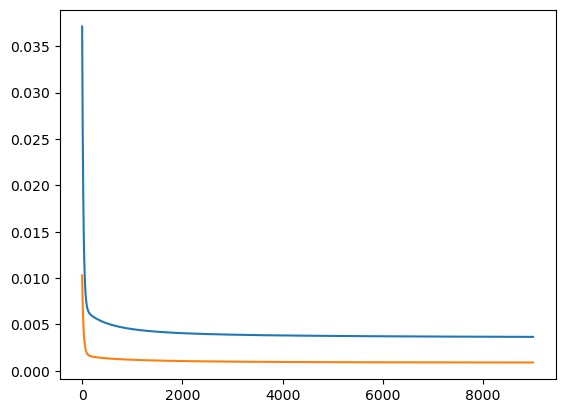

In [53]:
plt.plot(cost_history_b, label = "line 1")
plt.plot(cost_history2_b, label = "line 2")